# Logistic regression

Adapted from S. Raschka & V. Mirjalili's Python Machine Learning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# import iris dataset
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# get different info from the dataset
data = np.array(iris['data'])  # data
target = np.array(iris['target'])  # classifications

n_samples = data.shape[0]
n_features = data.shape[1]

target_names = iris['target_names']
feature_names = iris['feature_names']

In [5]:
data.shape, target.shape

((150, 4), (150,))

In [6]:
from ml.utils import scale_features, shuffle_training_examples

In [7]:
# normalise the features
data = scale_features(data)

In [8]:
# import Logistic Regression class
from ml.linear_classifier import LogisticRegression

In [9]:
classifier = LogisticRegression(1, 1)

In [10]:
# create a binary classifier for iris type = 0
y = np.where(target == 0, 1, 0)

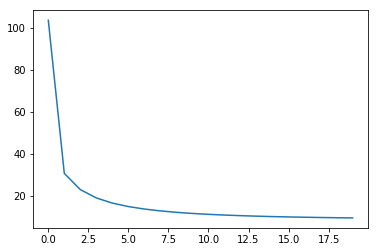

In [11]:
# use fit stochastic to update the weights one sample at a time
cost_per_iteration = classifier.fit(data, y, 20, 0.01)
plt.plot(cost_per_iteration)

In [12]:
print("n errors: %i" % (classifier.predict(data) - y != 0).sum())

n errors: 0


### Using both training and test sets

In [13]:
# shuffle the training data, not forgetting to keep the data and its classification aligned
shuffled_data, shuffled_target = shuffle_training_examples(data, target)
shuffled_data[:5], shuffled_target[:5]

(array([[ 1.2803405 ,  0.09821729,  0.93327055,  1.18556721],
        [ 0.55333328,  0.78880759,  1.0469454 ,  1.58046376],
        [ 0.67450115,  0.32841405,  0.42173371,  0.3957741 ],
        [-1.62768839, -1.74335684, -1.39706395, -1.18381211],
        [-0.05250608, -0.82256978,  0.76275827,  0.92230284]]),
 array([2., 2., 1., 0., 2.]))

In [18]:
# create a binary classifier for iris type = 1
shuffled_y = np.where(shuffled_target == 1, 1, 0)

In [19]:
n_training = 75

training_set = shuffled_data[:n_training,:]
training_y = shuffled_y[:n_training]

test_set = shuffled_data[n_training:,:]
test_y = shuffled_y[n_training:]

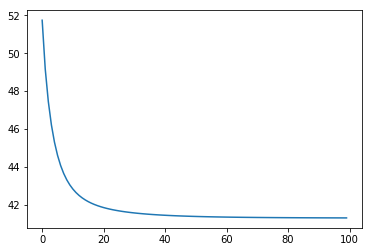

In [20]:
# use fit stochastic to update the weights one sample at a time
cost_per_iteration = classifier.fit(training_set, training_y, 100, 0.01)
plt.plot(cost_per_iteration)

In [21]:
print("n errors in train: %i" % (classifier.predict(training_set) - training_y != 0).sum())
print("n errors in test: %i" % (classifier.predict(test_set) - test_y != 0).sum())

n errors in train: 22
n errors in test: 18
